# Predicting hiraganas

In [1]:
import cv2
import keras
import numpy as np
import matplotlib.pyplot as plt
from sectioning import obtain_sections, draw_sections, sectionize_image, merge_all_sections, get_section

## Train model

In [2]:
x_train = np.load('model/k49-train-imgs.npz')
y_train = np.load('model/k49-train-labels.npz')

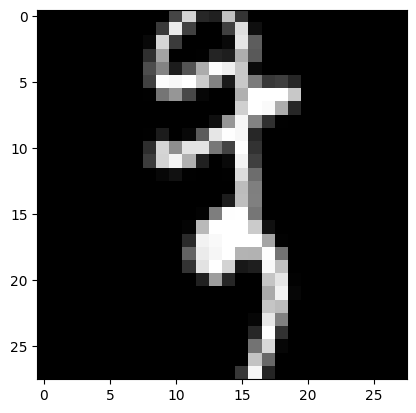

In [3]:
plt.imshow(x_train["arr_0"][0], cmap="grey")

In [4]:
y_train["arr_0"]

array([30, 19, 20, ..., 10, 39, 30], dtype=uint8)

In [5]:
model = keras.saving.load_model("model/kanji_model_350_epochs.hdf5")

## Map class to hiragana

In [6]:
num_classes = 49

In [7]:
def load(f):
    return np.load(f)['arr_0']

In [8]:
# Based on test set
x_img = load('model/k49-test-imgs.npz')
y_class = keras.utils.to_categorical(load('model/k49-test-labels.npz'), num_classes)
y_class = np.argmax(y_class, axis=1)

# Based on train set
## x_img = load('model/k49-train-imgs.npz')
## y_class = keras.utils.to_categorical(load('model/k49-train-labels.npz'), num_classes)

In [9]:
# Checking the number of classes
y_class_unique = np.unique(y_class)
print(f"All classes represented in the sample: {len(y_class_unique) == num_classes}")

All classes represented in the sample: True


In [10]:
map_class2img = {}
for i in range(num_classes):
    idx = np.where(y_class == i)[0][0]
    map_class2img[i] = x_img[idx]

In [11]:
def map2img(class_number):
    plt.imshow(map_class2img[class_number], cmap="gray")
    plt.title(f"Prediction: Class {class_number}")
    plt.show()

## Predict

### Input

In [12]:
def input_preprocessing(img_name):

    # B&W Convertion
    img = cv2.imread("./images/"+img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Blurred
    blurred_image = cv2.GaussianBlur(img, (5, 5), 0)

    # Canny
    canny_image = cv2.Canny(blurred_image, 225, 255)

    # Sections
    sections_limits, _ = obtain_sections(canny_image)
    new_sections_limits = merge_all_sections(sections_limits, 2)

    sections = sectionize_image(canny_image, new_sections_limits)

    return canny_image, new_sections_limits, sections

In [13]:
img_name = "hiragana_sign_1.png"
canny_image, section_limits, sections = input_preprocessing(img_name)

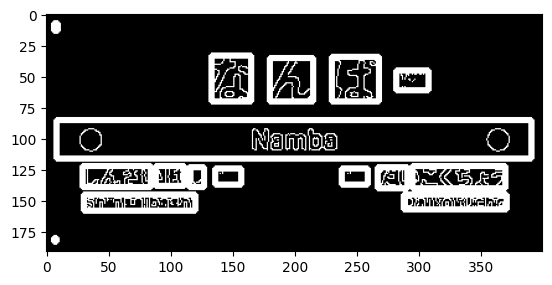

0 ((np.int32(180), np.int32(184)), (np.int32(6), np.int32(9)))
1 ((np.int32(145), np.int32(158)), (np.int32(288), np.int32(372)))
2 ((np.int32(122), np.int32(139)), (np.int32(88), np.int32(112)))
3 ((np.int32(85), np.int32(117)), (np.int32(8), np.int32(392)))
4 ((np.int32(45), np.int32(62)), (np.int32(282), np.int32(309)))
5 ((np.int32(145), np.int32(159)), (np.int32(30), np.int32(121)))
6 ((np.int32(122), np.int32(140)), (np.int32(29), np.int32(85)))
7 ((np.int32(35), np.int32(71)), (np.int32(180), np.int32(216)))
8 ((np.int32(124), np.int32(138)), (np.int32(238), np.int32(260)))
9 ((np.int32(124), np.int32(138)), (np.int32(136), np.int32(158)))
10 ((np.int32(7), np.int32(14)), (np.int32(6), np.int32(10)))
11 ((np.int32(123), np.int32(140)), (np.int32(115), np.int32(128)))
12 ((np.int32(34), np.int32(71)), (np.int32(230), np.int32(269)))
13 ((np.int32(123), np.int32(141)), (np.int32(267), np.int32(292)))
14 ((np.int32(122), np.int32(141)), (np.int32(295), np.int32(371)))
15 ((np.int32

In [14]:
plt.imshow(draw_sections(canny_image, section_limits), cmap="grey")
plt.show()

for idx, limits in enumerate(section_limits):
    print(idx, limits)

### Output

In [24]:
# target = sections[7]
target = sections[15]

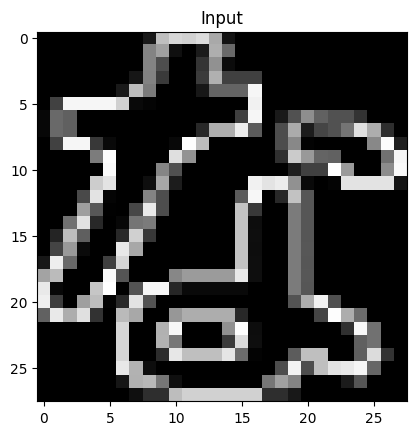

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted class: 46


In [25]:
section = cv2.resize(target, (28, 28))
plt.imshow(section, cmap="grey")
plt.title("Input")
plt.show()

section = section.astype('float32')
section /= 255

predictions = model.predict(np.array([section]))
prediction = predictions.argmax()
print(f"Predicted class: {prediction}")

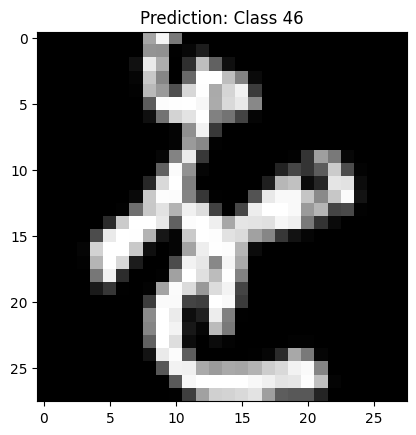

In [26]:
map2img(prediction)